# Sentiment Analysis Demonstration

This is a simple sentiment analysis demonstration from Medium

https://medium.com/analytics-vidhya/simple-sentiment-analysis-python-bf9de2d75d0

## Imports & Downloads

In [31]:
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/olivia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Read in the data

If you need to download the data, then get it from here: 
https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

In [4]:
data = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [5]:
data.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [6]:
data.shape

(42656, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
Review_ID            42656 non-null int64
Rating               42656 non-null int64
Year_Month           42656 non-null object
Reviewer_Location    42656 non-null object
Review_Text          42656 non-null object
Branch               42656 non-null object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


## Prepare the data

In [8]:
reviews = data[['Review_ID', 'Review_Text']]

In [9]:
reviews.head(5)

,Review_ID,Review_Text
0,670772142,If you've ever been to Disneyland anywhere you...
1,670682799,Its been a while since d last time we visit HK...
2,670623270,Thanks God it wasn t too hot or too humid wh...
3,670607911,HK Disneyland is a great compact park. Unfortu...
4,670607296,"the location is not in the city, took around 1..."


## How to apply VADER to one review

In [10]:
rev = reviews['Review_Text'][10]
rev

"Disneyland never cease to amaze me! I've been to Disneyland florida and I thought I have exhausted the kid in me but nope! I still had so much fun in disneyland hong kong. 2 DL off my bucketlist and more to come!     "

In [25]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(rev)

{'neg': 0.083, 'neu': 0.788, 'pos': 0.129, 'compound': 0.621}

In [24]:
body = reviews.Review_Text
neg, neu, pos, compound = [],[],[],[]
for review in body:
    res = analyzer.polarity_scores(review)
    neg.append(res['neg'])
    neu.append(res['neu'])
    pos.append(res['pos'])
    compound.append(res['compound'])

In [13]:
len(compound)

42656

In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 7 columns):
Review_ID        42656 non-null int64
Review_Text      42656 non-null object
Negative         42656 non-null float64
Neutral          42656 non-null float64
Positive         42656 non-null float64
Compound         42656 non-null float64
Sentiment_Tag    42656 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB


In [15]:
reviews['Negative'] = neg
reviews['Neutral'] = neu
reviews['Positive'] = pos
reviews['Compound'] = compound
reviews.head(5)

/tmp/ipykernel_1223/1134790913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Negative'] = neg
/tmp/ipykernel_1223/1134790913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Neutral'] = neu
/tmp/ipykernel_1223/1134790913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Review_ID,Review_Text,Negative,Neutral,Positive,Compound
0,670772142,If you've ever been to Disneyland anywhere you...,0.000,0.887,0.113,0.7069
1,670682799,Its been a while since d last time we visit HK...,0.040,0.730,0.231,0.9901
2,670623270,Thanks God it wasn t too hot or too humid wh...,0.024,0.742,0.235,0.9920
3,670607911,HK Disneyland is a great compact park. Unfortu...,0.080,0.760,0.160,0.8489
4,670607296,"the location is not in the city, took around 1...",0.000,0.899,0.101,0.2846


In [16]:
tags = []
for i in range(len(reviews)):
    winning_val = max(neg[i], pos[i])
    if(winning_val == neg[i]):
        tags.append('Negative')
    else:
        tags.append('Positive')

In [21]:
reviews['Sentiment_Tag'] = tags
reviews.head()

,Review_ID,Review_Text,Negative,Neutral,Positive,Compound,Sentiment_Tag
0,670772142,If you've ever been to Disneyland anywhere you...,0.000,0.887,0.113,0.7069,Positive
1,670682799,Its been a while since d last time we visit HK...,0.040,0.730,0.231,0.9901,Positive
2,670623270,Thanks God it wasn t too hot or too humid wh...,0.024,0.742,0.235,0.9920,Positive
3,670607911,HK Disneyland is a great compact park. Unfortu...,0.080,0.760,0.160,0.8489,Positive
4,670607296,"the location is not in the city, took around 1...",0.000,0.899,0.101,0.2846,Positive


In [29]:
total_review = len(reviews)
negative_reviews = reviews['Sentiment_Tag'][reviews['Sentiment_Tag'] == 'Negative'].count()
positive_reviews = reviews['Sentiment_Tag'][reviews['Sentiment_Tag'] == 'Positive'].count()

In [30]:
print('review: ', (positive_reviews/total_review)*100, 'positive')

review:  88.52447486871718 positive


## plot it

In [32]:
import numpy as np
import matplotlib.pyplot as plt

print('np ver:\t\t', np.__version__)

np ver:		 1.17.4


<function matplotlib.pyplot.show(*args, **kw)>

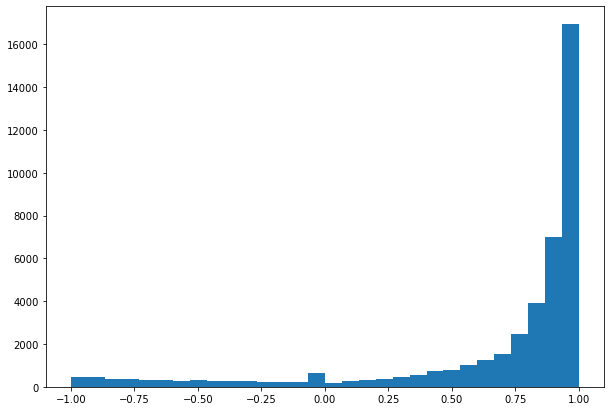

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(reviews['Compound'],bins=30)
plt.show